In [1]:
df<-read.csv('d:/data/creditcard/creditcard.csv')
head(df)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [2]:
library(dplyr)
df<-df %>% select(-Time)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 284807     30

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0



     0      1 
284315    492 

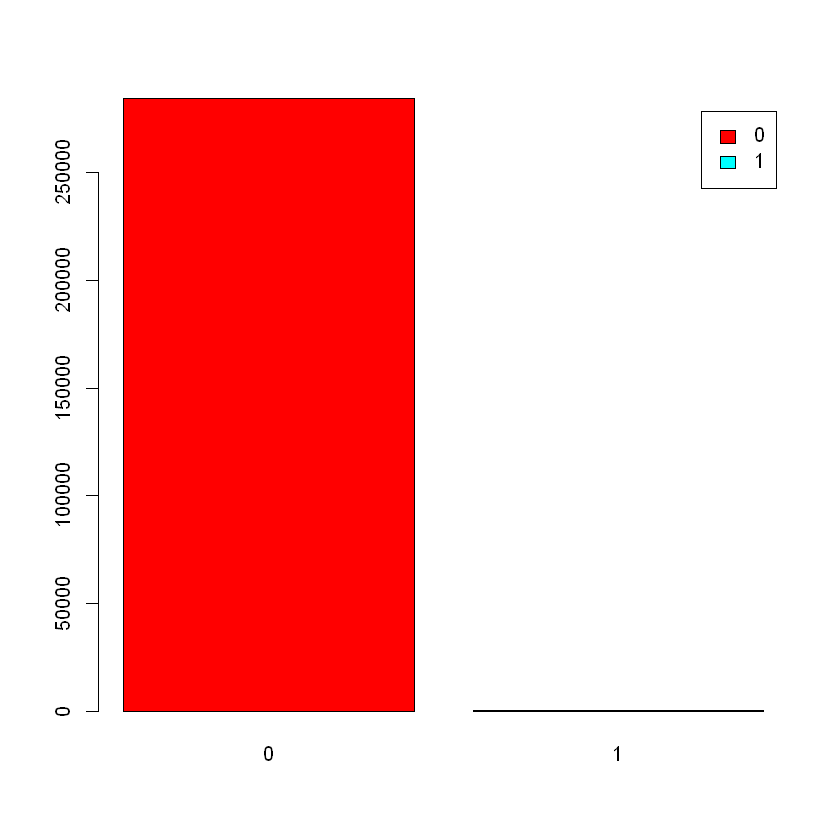

In [3]:
(tbl<-table(df$Class))
barplot(tbl, beside=T, legend=T, col=rainbow(2))

In [4]:
library(ROSE)
df_samp<-ovun.sample(Class ~ . , data=df, seed=1, method='under',
                    N=492*2)$data
(tbl<-table(df_samp$Class))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
492 492 

In [5]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$Class,p=0.8,list=F)
train<-df_samp[idx_train,]
X_train<-train[,-30]
y_train<-train[,30]
test<-df_samp[-idx_train,]
X_test<-test[,-30]
y_test<-test[,30]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [6]:
#로지스틱 회귀분석 모형
model<-glm(Class ~ . , data=train, family=binomial)
summary(model)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9841  -0.2028   0.0000   0.0000   3.2318  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -30.714    163.499  -0.188    0.851
V1             1.227     35.695   0.034    0.973
V2            49.417    240.831   0.205    0.837
V3           -27.469     93.455  -0.294    0.769
V4            20.462     76.116   0.269    0.788
V5            -5.544     10.221  -0.542    0.588
V6           -22.685    109.525  -0.207    0.836
V7           -82.638    377.199  -0.219    0.827
V8            15.307     64.042   0.239    0.811
V9           -27.753    115.172  -0.241    0.810
V10          -63.178    264.772  -0.239    0.811
V11           51.016    224.741   0.227    0.820
V12          -92.234    403.640  -0.229    0.819
V13           -1.913     10.645  -0.180    0.857
V14          -99.738    440.538  -0.226    0.821
V15           -3.340  

In [7]:
#후진제거법
reduced<-step(model,direction='backward')

Start:  AIC=230.48
Class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + 
    V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + 
    V22 + V23 + V24 + V25 + V26 + V27 + V28 + Amount



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

         Df Deviance    AIC
- V5      1   170.48 228.48
- V1      1   170.48 228.48
- V20     1   172.26 230.26
<none>        170.48 230.48
- V26     1   173.10 231.10
- V13     1   174.62 232.62
- V21     1   174.70 232.70
- V27     1   176.02 234.02
- V3      1   176.91 234.91
- V24     1   177.03 235.03
- V23     1   179.04 237.04
- V4      1   179.19 237.19
- V8      1   182.88 240.88
- V15     1   183.28 241.28
- Amount  1   184.63 242.63
- V25     1   186.40 244.40
- V9      1   189.09 247.09
- V19     1   190.07 248.07
- V22     1   190.68 248.68
- V10     1   190.77 248.77
- V18     1   191.46 249.46
- V2      1   191.63 249.63
- V7      1   191.71 249.71
- V17     1   193.61 251.61
- V28     1   193.69 251.69
- V6      1   194.09 252.09
- V16     1   194.23 252.23
- V11     1   194.92 252.92
- V12     1   205.45 263.45
- V14     1   220.99 278.99


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=228.48
Class ~ V1 + V2 + V3 + V4 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + 
    V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + 
    V23 + V24 + V25 + V26 + V27 + V28 + Amount



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

         Df Deviance    AIC
<none>        170.48 228.48
- V26     1   174.56 230.56
- V27     1   177.66 233.66
- V24     1   178.46 234.46
- V15     1   183.29 239.29
- V13     1   184.30 240.30
- V21     1   184.35 240.35
- V1      1   185.28 241.28
- V8      1   185.81 241.81
- V20     1   186.46 242.46
- V25     1   186.62 242.62
- V23     1   186.99 242.99
- V3      1   190.79 246.79
- V19     1   191.87 247.87
- V2      1   191.87 247.87
- V7      1   192.23 248.23
- Amount  1   192.32 248.32
- V22     1   192.89 248.89
- V18     1   193.04 249.04
- V28     1   193.82 249.82
- V17     1   193.97 249.97
- V6      1   194.10 250.10
- V10     1   194.73 250.73
- V16     1   194.86 250.86
- V9      1   195.38 251.38
- V11     1   195.72 251.72
- V12     1   205.46 261.46
- V14     1   220.99 276.99
- V4      1   231.53 287.53


In [10]:
#svm모형
library(e1071)
set.seed(123)
tune.out<-tune(svm, Class~ . , data=train,
              range=list(cost=c(0.001,0.01,0.1,1,10),
              gamma=c(0.0001,0.001,0.01,0.1)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10  0.01

- best performance: 0.05182245 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-03 1e-04 0.50146771 0.03671971
2  1e-02 1e-04 0.48973918 0.03752386
3  1e-01 1e-04 0.38470468 0.05106826
4  1e+00 1e-04 0.17574506 0.02425116
5  1e+01 1e-04 0.11426653 0.01617768
6  1e-03 1e-03 0.49086164 0.03730476
7  1e-02 1e-03 0.39341009 0.04907069
8  1e-01 1e-03 0.17328566 0.02425225
9  1e+00 1e-03 0.10428120 0.01603600
10 1e+01 1e-03 0.07416333 0.01543939
11 1e-03 1e-02 0.44201336 0.04044903
12 1e-02 1e-02 0.15930366 0.03167653
13 1e-01 1e-02 0.08400859 0.01744923
14 1e+00 1e-02 0.06125226 0.01802664
15 1e+01 1e-02 0.05182245 0.01785770
16 1e-03 1e-01 0.45261407 0.03398810
17 1e-02 1e-01 0.15122662 0.02027858
18 1e-01 1e-01 0.06551709 0.02409147
19 1e+00 1e-01 0.05213895 0.02350084
20 1e+01 1e-01 0.05559456 0.02341512


In [11]:
#학습용 데이터셋으로 모형의 성능 확인
pred<-predict(bestmodel,X_train)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

ERROR: Error in predict(bestmodel, X_train): 객체 'bestmodel'를 찾을 수 없습니다


In [ ]:
#검증용 데이터셋으로 모형의 성능 확인
pred<-predict(bestmodel,X_test)
result<-round(pred)
table(y_test,result)
mean(y_test==result)